<a href="https://colab.research.google.com/github/gnbhub/gnbai20211/blob/master/week4/week4-doseunghwan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
file_path = '/content/data_lab1.txt'

col_name = ['x' , 'y']

df = pd.read_csv(file_path, sep = ' ', names = col_name)
x_train = df['x'].values.reshape(-1, 1)
y_train = df['y'].values.reshape(-1, 1)

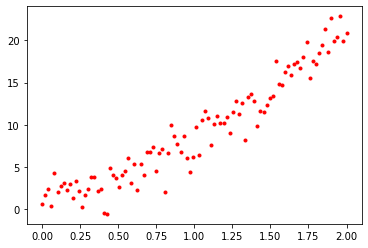

In [10]:
plt.plot(x_train, y_train, 'r.', label='train')

In [12]:
class LinearRegressor:
    
    def __init__(self, opt='bgd', lr=0.001):
        self.opt     = opt
        self.lr      = lr
        self.weight  = None
        self.history = []
    
    def fit(self, x, t, epochs=200, print_step=10): #fit라는 메소드
        assert x.shape[0] == t.shape[0] 
        assert len(x.shape) == 2    #파일이 정상적인지 확인
        
        self.num, self.dim = x.shape
        
        x = np.concatenate((np.ones((self.num, 1)), x), axis=1)
        self.weight = np.random.randn(self.dim+1)
        
        for epoch in range(1, epochs+1):
            y = self.forward(x)
            self.backward(x, y, t)            
            
            if epoch % print_step == 0:
                err = self.error(y, t)
                print(f'epoch: {epoch}  sse: {err}')
                self.history.append(err)
        
    
    def forward(self, x):
        y = [self.pred(xi) for xi in x]
        
        return np.array(y).reshape(-1, 1)
        
        
    def pred(self, xi):
        assert self.weight.shape == xi.shape
        
        return np.dot(self.weight, xi)
    
    
    def error(self, y, t):
        assert y.shape == t.shape
        
        return ((y - t)**2).sum() / 2
    
    
    def backward(self, x, y, t):
        
        if self.opt == 'bgd':
            for n in range(self.dim+1):
                g = 0.
                for i in range(self.num):
                    g += (y[i] - t[i]) * x[i][n]
                self.weight[n] -= self.lr * g
        
        elif self.opt == 'sgd':
            for n in range(self.dim+1):
                i = np.random.randint(self.num)
                g = (y[i] - t[i]) * x[i][n]
                self.weight[n] -= self.lr * g

In [13]:
bgd = LinearRegressor(opt='bgd')

bgd.fit(x_train, y_train, epochs=200)

print('weight :', bgd.weight)

epoch: 10  sse: 830.2225648387118
epoch: 20  sse: 593.4661379197588
epoch: 30  sse: 482.53984895787573
epoch: 40  sse: 401.93959917001206
epoch: 50  sse: 343.05169959061067
epoch: 60  sse: 300.02486055945144
epoch: 70  sse: 268.5869948808221
epoch: 80  sse: 245.6166948084352
epoch: 90  sse: 228.83328174734785
epoch: 100  sse: 216.57036166830875
epoch: 110  sse: 207.61037192620094
epoch: 120  sse: 201.06369171779755
epoch: 130  sse: 196.28031327823498
epoch: 140  sse: 192.7853038127196
epoch: 150  sse: 190.23165029807961
epoch: 160  sse: 188.36580520175693
epoch: 170  sse: 187.00251221642716
epoch: 180  sse: 186.00641250401677
epoch: 190  sse: 185.27860516711925
epoch: 200  sse: 184.74682756188315
weight : [-0.62329742  9.96234406]


In [16]:
sgd = LinearRegressor(opt='sgd')

sgd.fit(x_train, y_train, epochs=2000, print_step=100)

print('weight :', sgd.weight)

epoch: 100  sse: 4435.38699810368
epoch: 200  sse: 3153.888090831418
epoch: 300  sse: 2125.8134410470934
epoch: 400  sse: 1494.6420784599045
epoch: 500  sse: 1160.3055654154332
epoch: 600  sse: 915.9769101281456
epoch: 700  sse: 763.1177026430283
epoch: 800  sse: 636.6222423149869
epoch: 900  sse: 560.2595002422087
epoch: 1000  sse: 510.1419801948065
epoch: 1100  sse: 468.00583062587725
epoch: 1200  sse: 443.21603326743855
epoch: 1300  sse: 425.27570424321345
epoch: 1400  sse: 406.4188893226839
epoch: 1500  sse: 392.9922207820021
epoch: 1600  sse: 390.15388456206904
epoch: 1700  sse: 382.61549505984794
epoch: 1800  sse: 373.54747309898477
epoch: 1900  sse: 366.5966069260177
epoch: 2000  sse: 361.42885704740894
weight : [2.58353446 7.05577304]


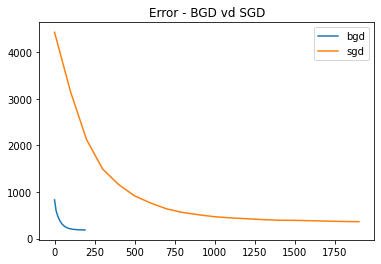

Final error
BGD : 184.74682756188315
SGD : 361.42885704740894


In [17]:
plt.plot(range(0, 200, 10), bgd.history, label='bgd')
plt.plot(range(0, 2000, 100), sgd.history, label='sgd')

plt.title('Error - BGD vd SGD')
plt.legend()
plt.show()

print('Final error')
print('BGD :', bgd.history[-1])
print('SGD :', sgd.history[-1])

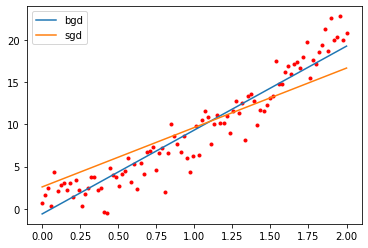

In [20]:
def plot_line(w, x, label):
    y = [w[0] + w[1] * xi for xi in x]
    plt.plot(x, y, label=label)

x = np.linspace(0, 2)

plt.plot(x_train, y_train, 'r.')
plot_line(bgd.weight, x, 'bgd')
plot_line(sgd.weight, x, 'sgd')

plt.legend()
plt.show()
